# Modelos Base Tradicionales

**Objetivo**: Probar varios algoritmos clásicos de machine learning para establecer líneas base sólidas.

Antes de ir a modelos complejos, necesito entender qué tan bien funcionan los algoritmos básicos. Esto me va a dar:

- Una línea base clara de rendimiento
- Comprensión de qué features son más importantes
- Identificar si hay overfitting o problemas en los datos
- Justificar si vale la pena usar modelos más complejos

## Modelos que voy a probar

1. **Random Forest**: Robusto, maneja bien outliers, da importancia de features
2. **Decision Tree**: Simple, interpretable, baseline más básico
3. **Extra Trees**: Variante de RF con más aleatoriedad
4. **Logistic Regression**: Linear, rápido, interpretable
5. **K-Nearest Neighbors**: No paramétrico, buen contraste con métodos lineales

Voy a usar validación cruzada para todos y comparar con métricas balanceadas.

In [2]:
# Importaciones básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Plotly para visualizaciones interactivas
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# Machine learning
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, f1_score, 
                           roc_curve, auc, precision_recall_curve)
from sklearn.preprocessing import StandardScaler

# Para guardar resultados
import joblib
import json
import os

print(f"Iniciando experimentos con modelos tradicionales - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Iniciando experimentos con modelos tradicionales - 2025-08-19 19:17:17


In [3]:
# Cargar datos procesados
print("Cargando datos procesados...")

df = pd.read_csv('../processed_data/dataset_features_processed.csv')
print(f"Dataset cargado: {df.shape[0]:,} filas, {df.shape[1]} columnas")

# Separar features y target
X = df.drop('BinaryNumTarget', axis=1)
y = df['BinaryNumTarget']

print(f"Features: {X.shape[1]}")
print(f"Distribución de clases:")
class_dist = y.value_counts(normalize=True)
for clase, prop in class_dist.items():
    label = "Falso" if clase == 0 else "Verdadero"
    print(f"  {label}: {prop:.3f} ({y.value_counts()[clase]:,} muestras)")

# Verificar que no hay valores faltantes
missing = X.isnull().sum().sum()
print(f"Valores faltantes: {missing}")

# Mostrar algunas estadísticas básicas
print(f"\nRango de valores en X:")
print(f"  Mínimo: {X.min().min():.3f}")
print(f"  Máximo: {X.max().max():.3f}")
print(f"  Media general: {X.mean().mean():.3f}")

# Visualización interactiva de la distribución de clases
fig_clases = px.pie(
    values=y.value_counts().values,
    names=['Falso', 'Verdadero'],
    title="Distribución de Clases en el Dataset",
    color_discrete_sequence=['lightcoral', 'lightblue']
)
fig_clases.show()

# Visualización de estadísticas básicas de features
stats_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean': X.mean(),
    'Std': X.std(),
    'Min': X.min(),
    'Max': X.max()
}).reset_index(drop=True)

# Gráfico interactivo de estadísticas
fig_stats = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Media por Feature', 'Desviación Estándar', 'Valores Mínimos', 'Valores Máximos'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Media
fig_stats.add_trace(
    go.Scatter(x=list(range(len(stats_df))), y=stats_df['Mean'], 
               mode='markers', name='Media', showlegend=False),
    row=1, col=1
)

# Std
fig_stats.add_trace(
    go.Scatter(x=list(range(len(stats_df))), y=stats_df['Std'], 
               mode='markers', name='Std', showlegend=False, marker_color='orange'),
    row=1, col=2
)

# Min
fig_stats.add_trace(
    go.Scatter(x=list(range(len(stats_df))), y=stats_df['Min'], 
               mode='markers', name='Min', showlegend=False, marker_color='red'),
    row=2, col=1
)

# Max
fig_stats.add_trace(
    go.Scatter(x=list(range(len(stats_df))), y=stats_df['Max'], 
               mode='markers', name='Max', showlegend=False, marker_color='green'),
    row=2, col=2
)

fig_stats.update_layout(
    title="Estadísticas Descriptivas de Features",
    height=600,
    showlegend=False
)
fig_stats.show()

Cargando datos procesados...
Dataset cargado: 134,198 filas, 58 columnas
Features: 57
Distribución de clases:
  Verdadero: 0.514 (68,930 muestras)
  Falso: 0.486 (65,268 muestras)
Valores faltantes: 0

Rango de valores en X:
  Mínimo: -7.110
  Máximo: 460320.000
  Media general: 1.059


In [4]:
# Cargar datos procesados
print("Cargando datos procesados...")

df = pd.read_csv('../processed_data/dataset_features_processed.csv')
print(f"Dataset cargado: {df.shape[0]:,} filas, {df.shape[1]} columnas")

# Separar features y target
X = df.drop('BinaryNumTarget', axis=1)
y = df['BinaryNumTarget']

print(f"Features: {X.shape[1]}")
print(f"Distribución de clases:")
class_dist = y.value_counts(normalize=True)
for clase, prop in class_dist.items():
    label = "Falso" if clase == 0 else "Verdadero"
    print(f"  {label}: {prop:.3f} ({y.value_counts()[clase]:,} muestras)")

# Verificar que no hay valores faltantes
missing = X.isnull().sum().sum()
print(f"Valores faltantes: {missing}")

# Mostrar algunas estadísticas básicas
print(f"\nRango de valores en X:")
print(f"  Mínimo: {X.min().min():.3f}")
print(f"  Máximo: {X.max().max():.3f}")
print(f"  Media general: {X.mean().mean():.3f}")

Cargando datos procesados...
Dataset cargado: 134,198 filas, 58 columnas
Features: 57
Distribución de clases:
  Verdadero: 0.514 (68,930 muestras)
  Falso: 0.486 (65,268 muestras)
Valores faltantes: 0

Rango de valores en X:
  Mínimo: -7.110
  Máximo: 460320.000
  Media general: 1.059


## Configuración de validación cruzada

Voy a usar validación cruzada estratificada de 5 folds. Esto es importante porque:
- Mantiene la proporción de clases en cada fold
- Me da una estimación más robusta del rendimiento
- Reduce la variabilidad por división aleatoria de datos

Voy a evaluar con F1-score como métrica principal porque es una buena métrica balanceada para clasificación binaria.

In [5]:
# Configurar validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = 'f1'  # F1-score como métrica principal

# También voy a calcular otras métricas para comparar
scoring_metrics = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']

print(f"Configuración de validación cruzada:")
print(f"  - Método: StratifiedKFold")
print(f"  - Folds: 5")
print(f"  - Métrica principal: F1-score")
print(f"  - Métricas adicionales: {', '.join(scoring_metrics)}")
print(f"  - Random state: 42")

Configuración de validación cruzada:
  - Método: StratifiedKFold
  - Folds: 5
  - Métrica principal: F1-score
  - Métricas adicionales: f1, precision, recall, accuracy, roc_auc
  - Random state: 42


## Función para evaluar modelos

Voy a crear una función que me permita evaluar cualquier modelo de forma consistente. Esto me va a ahorrar código repetitivo y asegurar que todos los modelos se evalúen igual.

In [6]:
def evaluar_modelo(modelo, X, y, cv, nombre_modelo):
    """
    Evalúa un modelo usando validación cruzada.
    
    Parámetros:
    - modelo: modelo de sklearn ya configurado
    - X, y: datos de entrada y target
    - cv: objeto de validación cruzada
    - nombre_modelo: string para identificar el modelo
    
    Retorna:
    - dict con resultados de todas las métricas
    """
    print(f"\nEvaluando {nombre_modelo}...")
    
    resultados = {}
    
    # Calcular cada métrica
    for metric in scoring_metrics:
        scores = cross_val_score(modelo, X, y, cv=cv, scoring=metric, n_jobs=-1)
        resultados[metric] = {
            'mean': scores.mean(),
            'std': scores.std(),
            'scores': scores.tolist()
        }
        print(f"  {metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    
    # Guardar configuración del modelo
    resultados['modelo'] = nombre_modelo
    resultados['parametros'] = modelo.get_params()
    resultados['timestamp'] = datetime.now().isoformat()
    
    return resultados

## Random Forest

Empiezo con Random Forest porque es un algoritmo muy robusto que suele funcionar bien out-of-the-box. 

Configuración que voy a usar:
- 100 árboles (balance entre rendimiento y velocidad)
- max_depth=15 (evitar overfitting extremo)
- class_weight='balanced' (compensar cualquier desbalance)
- Otros parámetros por defecto de sklearn

In [7]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_resultados = evaluar_modelo(rf_model, X, y, cv, "Random Forest")


Evaluando Random Forest...
  f1: 0.6749 (+/- 0.0113)
  precision: 0.7098 (+/- 0.0119)
  recall: 0.6434 (+/- 0.0138)
  accuracy: 0.6817 (+/- 0.0105)
  roc_auc: 0.7518 (+/- 0.0087)


## Decision Tree

Un árbol de decisión individual me va a dar una línea base más simple. Es útil para entender si la complejidad de Random Forest realmente aporta valor.

In [8]:
# Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

dt_resultados = evaluar_modelo(dt_model, X, y, cv, "Decision Tree")


Evaluando Decision Tree...
  f1: 0.6223 (+/- 0.0086)
  precision: 0.6591 (+/- 0.0058)
  recall: 0.5895 (+/- 0.0144)
  accuracy: 0.6325 (+/- 0.0056)
  roc_auc: 0.6839 (+/- 0.0043)


## Extra Trees

Extra Trees es similar a Random Forest pero con más aleatoriedad en la selección de splits. A veces puede funcionar mejor que RF, especialmente con features ruidosas.

In [9]:
# Extra Trees
et_model = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_split=8,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

et_resultados = evaluar_modelo(et_model, X, y, cv, "Extra Trees")


Evaluando Extra Trees...
  f1: 0.6428 (+/- 0.0066)
  precision: 0.6781 (+/- 0.0089)
  recall: 0.6111 (+/- 0.0064)
  accuracy: 0.6512 (+/- 0.0071)
  roc_auc: 0.7072 (+/- 0.0076)


## Logistic Regression

Regresión logística es importante como baseline linear. Me va a decir qué tan bien se pueden separar las clases con un modelo simple.

Nota: Los datos ya están escalados, así que no necesito hacer scaling adicional.

In [10]:
# Logistic Regression
lr_model = LogisticRegression(
    C=1.0,
    penalty='l2',
    solver='liblinear',
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

lr_resultados = evaluar_modelo(lr_model, X, y, cv, "Logistic Regression")


Evaluando Logistic Regression...
  f1: 0.6411 (+/- 0.0076)
  precision: 0.6527 (+/- 0.0088)
  recall: 0.6299 (+/- 0.0094)
  accuracy: 0.6378 (+/- 0.0078)
  roc_auc: 0.6893 (+/- 0.0089)


## K-Nearest Neighbors

KNN es útil como contraste porque es un método no paramétrico que puede capturar relaciones no lineales complejas. Voy a probar con k=5 como punto de partida.

In [11]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    metric='minkowski',
    n_jobs=-1
)

knn_resultados = evaluar_modelo(knn_model, X, y, cv, "K-Nearest Neighbors")


Evaluando K-Nearest Neighbors...
  f1: 0.6398 (+/- 0.0070)
  precision: 0.6345 (+/- 0.0045)
  recall: 0.6452 (+/- 0.0110)
  accuracy: 0.6269 (+/- 0.0054)
  roc_auc: 0.6736 (+/- 0.0062)


## Comparación de resultados

Ahora voy a compilar todos los resultados en una tabla para poder compararlos fácilmente.

In [12]:
# Recopilar todos los resultados
todos_resultados = {
    'Random Forest': rf_resultados,
    'Decision Tree': dt_resultados,
    'Extra Trees': et_resultados,
    'Logistic Regression': lr_resultados,
    'K-Nearest Neighbors': knn_resultados
}

# Crear tabla de comparación
tabla_comparacion = []

for nombre, resultado in todos_resultados.items():
    fila = {
        'Modelo': nombre,
        'F1-Score': resultado['f1']['mean'],
        'F1-Std': resultado['f1']['std'],
        'Precision': resultado['precision']['mean'],
        'Recall': resultado['recall']['mean'],
        'Accuracy': resultado['accuracy']['mean'],
        'ROC-AUC': resultado['roc_auc']['mean']
    }
    tabla_comparacion.append(fila)

# Convertir a DataFrame y ordenar por F1-Score
df_comparacion = pd.DataFrame(tabla_comparacion)
df_comparacion = df_comparacion.sort_values('F1-Score', ascending=False)

print("\n" + "="*80)
print("RESUMEN DE RESULTADOS - MODELOS TRADICIONALES")
print("="*80)

# Mostrar tabla formateada
print(f"\n{'Modelo':<20} {'F1-Score':<10} {'Precision':<10} {'Recall':<10} {'Accuracy':<10} {'ROC-AUC':<10}")
print("-" * 80)

for _, row in df_comparacion.iterrows():
    print(f"{row['Modelo']:<20} {row['F1-Score']:<10.4f} {row['Precision']:<10.4f} {row['Recall']:<10.4f} {row['Accuracy']:<10.4f} {row['ROC-AUC']:<10.4f}")

# Identificar el mejor modelo
mejor_modelo = df_comparacion.iloc[0]
print(f"\nMejor modelo: {mejor_modelo['Modelo']} (F1-Score: {mejor_modelo['F1-Score']:.4f})")


RESUMEN DE RESULTADOS - MODELOS TRADICIONALES

Modelo               F1-Score   Precision  Recall     Accuracy   ROC-AUC   
--------------------------------------------------------------------------------
Random Forest        0.6749     0.7098     0.6434     0.6817     0.7518    
Extra Trees          0.6428     0.6781     0.6111     0.6512     0.7072    
Logistic Regression  0.6411     0.6527     0.6299     0.6378     0.6893    
K-Nearest Neighbors  0.6398     0.6345     0.6452     0.6269     0.6736    
Decision Tree        0.6223     0.6591     0.5895     0.6325     0.6839    

Mejor modelo: Random Forest (F1-Score: 0.6749)


## Análisis de importancia de features

Para los modelos basados en árboles, voy a extraer la importancia de features. Esto me va a ayudar a entender qué características son más útiles para la clasificación.

Analizando importancia de features con Random Forest...

Top 15 features más importantes:
--------------------------------------------------
 1. listed_count              0.0686
 2. PERSON_percentage         0.0449
 3. favourites_count          0.0402
 4. followers_count           0.0399
 5. Average word length       0.0398
 6. normalize_influence       0.0388
 7. Word count                0.0386
 8. capitals                  0.0375
 9. statuses_count            0.0369
10. URLs                      0.0357
11. cred                      0.0356
12. friends_count             0.0326
13. short_word_freq           0.0283
14. past_verbs                0.0251
15. hashtags                  0.0247


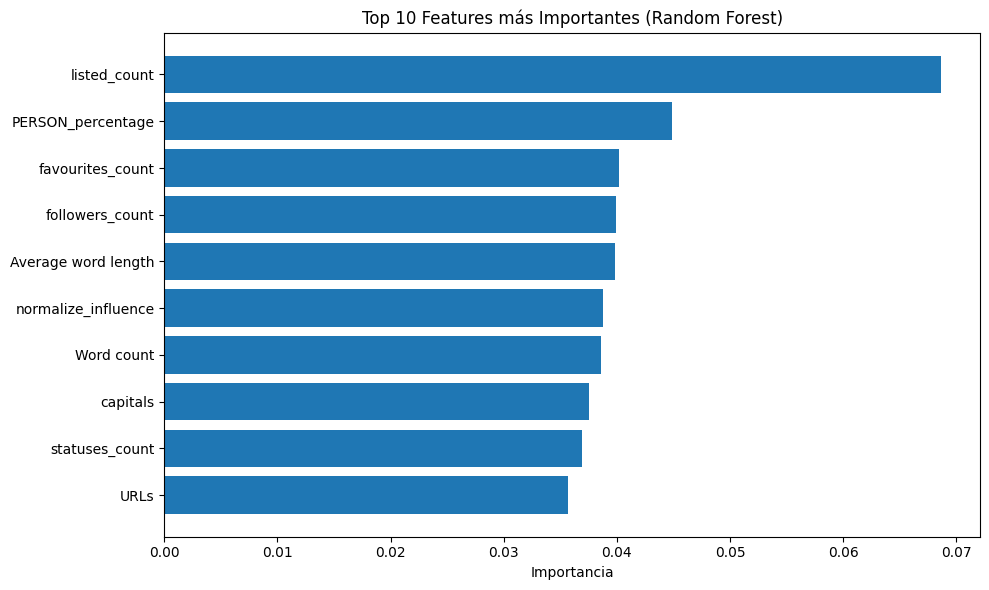


Número de features que explican 80% de la importancia: 26


In [13]:
# Entrenar Random Forest en todos los datos para obtener importancia de features
print("Analizando importancia de features con Random Forest...")

rf_full = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_full.fit(X, y)

# Obtener importancia de features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_full.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 15 features más importantes:")
print("-" * 50)
for i, (_, row) in enumerate(feature_importance.head(15).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<25} {row['importance']:.4f}")

# Visualizar top 10
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia')
plt.title('Top 10 Features más Importantes (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Calcular importancia acumulada
feature_importance['importancia_acumulada'] = feature_importance['importance'].cumsum()
features_80_pct = feature_importance[feature_importance['importancia_acumulada'] <= 0.8]
print(f"\nNúmero de features que explican 80% de la importancia: {len(features_80_pct)}")

## Visualización de resultados

Voy a crear algunas visualizaciones para entender mejor cómo se comparan los modelos.

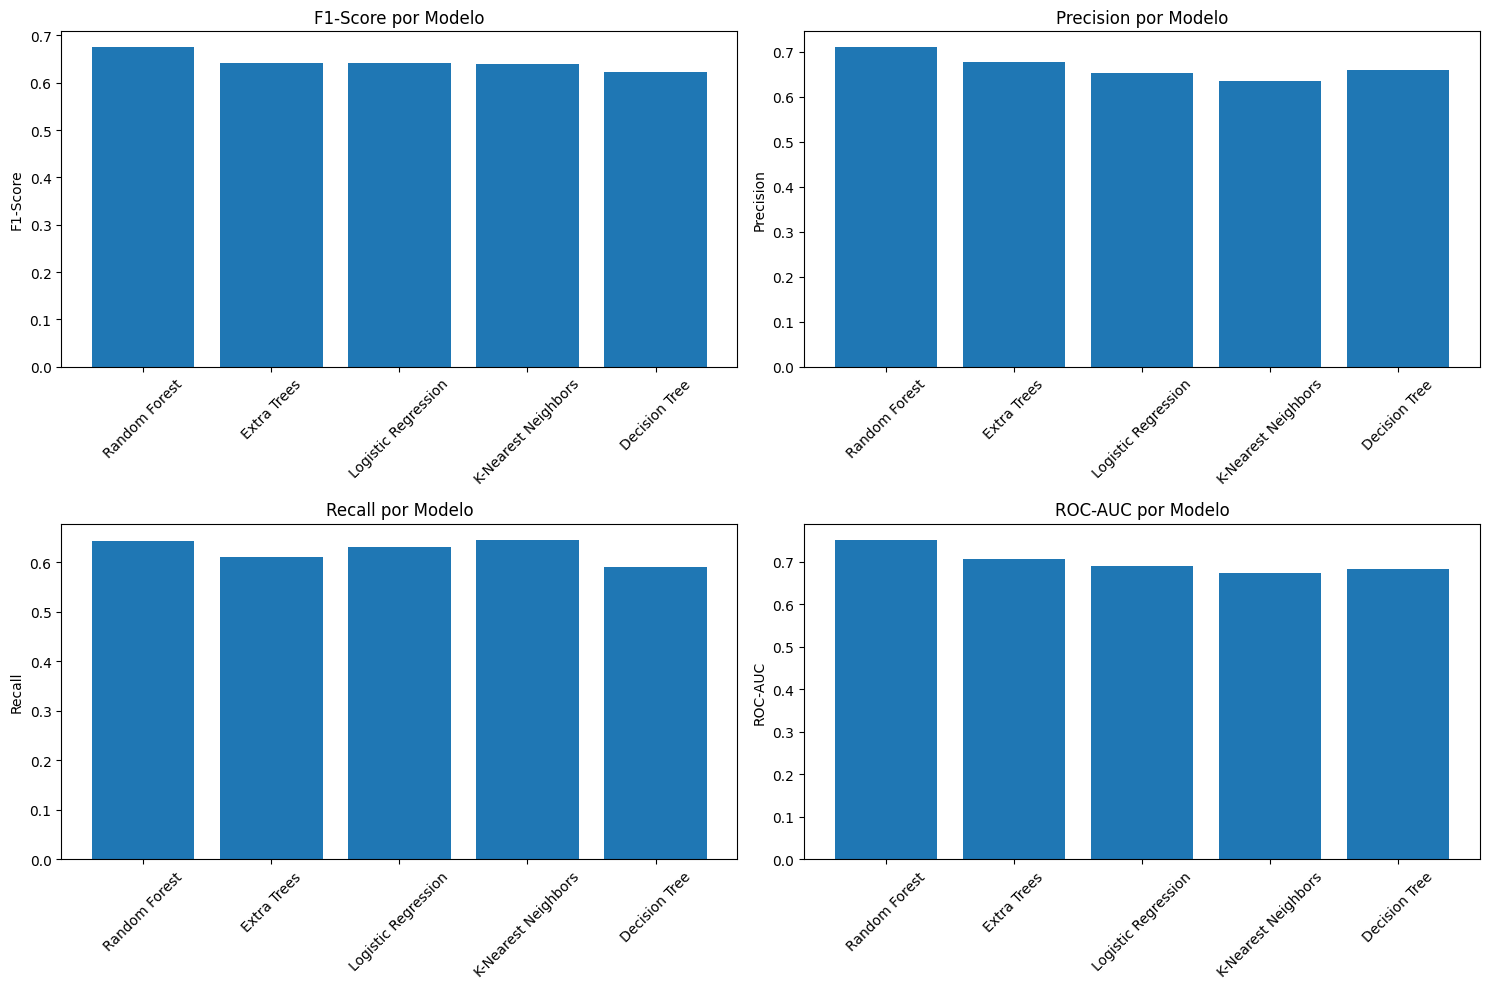

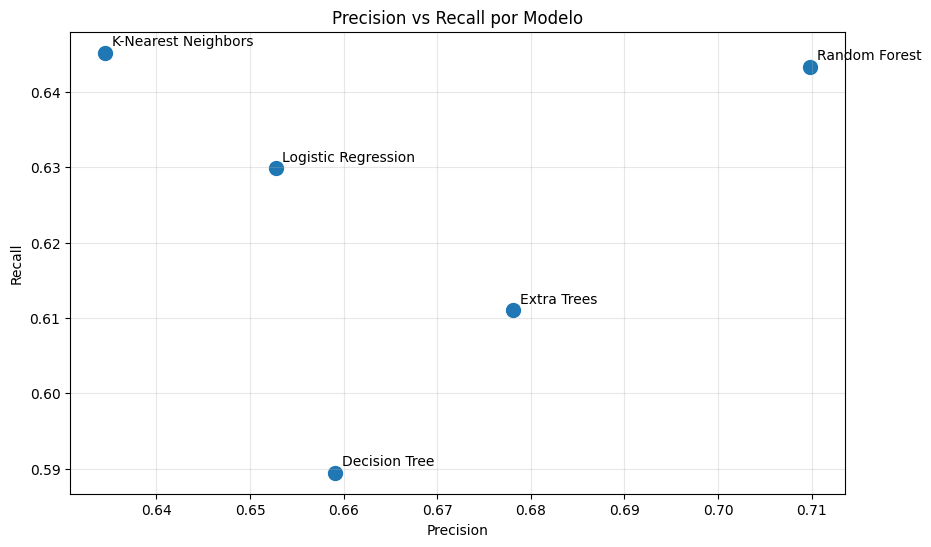

In [14]:
# Gráfico de barras comparativo
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# F1-Score
ax1.bar(df_comparacion['Modelo'], df_comparacion['F1-Score'])
ax1.set_title('F1-Score por Modelo')
ax1.set_ylabel('F1-Score')
ax1.tick_params(axis='x', rotation=45)

# Precision
ax2.bar(df_comparacion['Modelo'], df_comparacion['Precision'])
ax2.set_title('Precision por Modelo')
ax2.set_ylabel('Precision')
ax2.tick_params(axis='x', rotation=45)

# Recall
ax3.bar(df_comparacion['Modelo'], df_comparacion['Recall'])
ax3.set_title('Recall por Modelo')
ax3.set_ylabel('Recall')
ax3.tick_params(axis='x', rotation=45)

# ROC-AUC
ax4.bar(df_comparacion['Modelo'], df_comparacion['ROC-AUC'])
ax4.set_title('ROC-AUC por Modelo')
ax4.set_ylabel('ROC-AUC')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Gráfico de dispersión Precision vs Recall
plt.figure(figsize=(10, 6))
plt.scatter(df_comparacion['Precision'], df_comparacion['Recall'], s=100)

for i, row in df_comparacion.iterrows():
    plt.annotate(row['Modelo'], 
                (row['Precision'], row['Recall']),
                xytext=(5, 5), textcoords='offset points')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall por Modelo')
plt.grid(True, alpha=0.3)
plt.show()

## Guardar resultados

Voy a guardar todos los resultados para poder usarlos en notebooks posteriores y para tener un registro completo de los experimentos.

In [15]:
# Crear directorio de resultados si no existe
os.makedirs('../models', exist_ok=True)

# Guardar resultados completos
resultados_completos = {
    'timestamp': datetime.now().isoformat(),
    'notebook': '03_modelos_base_tradicionales',
    'descripcion': 'Evaluación de modelos tradicionales de ML',
    'configuracion': {
        'cv_folds': 5,
        'random_state': 42,
        'scoring_principal': 'f1',
        'datos': {
            'n_samples': len(X),
            'n_features': len(X.columns),
            'clase_positiva_prop': float(y.mean())
        }
    },
    'resultados_por_modelo': todos_resultados,
    'tabla_comparacion': df_comparacion.to_dict('records'),
    'mejor_modelo': {
        'nombre': mejor_modelo['Modelo'],
        'f1_score': float(mejor_modelo['F1-Score']),
        'metricas_completas': todos_resultados[mejor_modelo['Modelo']]
    },
    'feature_importance': feature_importance.head(20).to_dict('records')
}

# Guardar como JSON
with open('../models/resultados_modelos_tradicionales-NoWinsorizing.json', 'w') as f:
    json.dump(resultados_completos, f, indent=2)

# Guardar tabla de comparación como CSV
df_comparacion.to_csv('../models/comparacion_modelos_tradicionales.csv', index=False)

# Guardar el mejor modelo entrenado
mejor_modelo_obj = todos_resultados[mejor_modelo['Modelo']]
if mejor_modelo['Modelo'] == 'Random Forest':
    joblib.dump(rf_full, '../models/mejor_modelo_tradicional.pkl')
elif mejor_modelo['Modelo'] == 'Extra Trees':
    et_full = ExtraTreesClassifier(**et_model.get_params())
    et_full.fit(X, y)
    joblib.dump(et_full, '../models/mejor_modelo_tradicional.pkl')
# Agregar otros modelos según sea necesario

print("Resultados guardados:")
print("- ../models/resultados_modelos_tradicionales.json")
print("- ../models/comparacion_modelos_tradicionales.csv")
print("- ../models/mejor_modelo_tradicional.pkl")

print(f"\nMejor modelo: {mejor_modelo['Modelo']} con F1-Score: {mejor_modelo['F1-Score']:.4f}")

Resultados guardados:
- ../models/resultados_modelos_tradicionales.json
- ../models/comparacion_modelos_tradicionales.csv
- ../models/mejor_modelo_tradicional.pkl

Mejor modelo: Random Forest con F1-Score: 0.6749
